In [1]:
import pandas as pd
import seaborn as sns
import scipy.stats as st
import numpy as np
import random
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.colors import ListedColormap
from scipy import stats
from sklearn import preprocessing

In [2]:
# Cargar los datos

df = pd.read_csv("C:/Users/Lenovo/anaconda3/Fish.csv")
df.head(3)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961


In [5]:
# Revisamos valor nulos para columnas earn, height, age y male
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


(159, 7)

In [8]:
#1. Crea una nueva columna que incluya el volumen de pez, asumiéndolo como un cilindro. 

df['Volume'] = (np.pi*df['Height'])*(df['Width']/2)**2

In [9]:
df.head(3)

,Species,Weight,Length1,Length2,Length3,Height,Width,Volume
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,146.215854
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,181.707071
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,214.391723


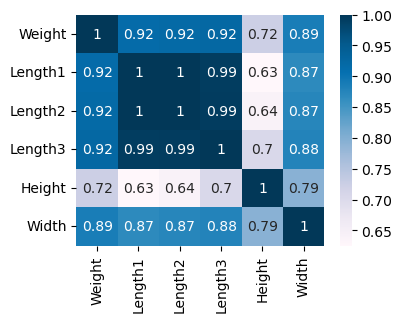

In [15]:
#2. -Verifica la correlación posible entre las variables, numérica y gráficamente.¿Aumenta la correlación al añadir el volumen? Explica.

data=df.loc[:,'Weight':'Width']

plt.figure(figsize=(4,3))
sns.heatmap(data.corr(), annot=True, cmap=plt.cm.PuBu)
plt.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


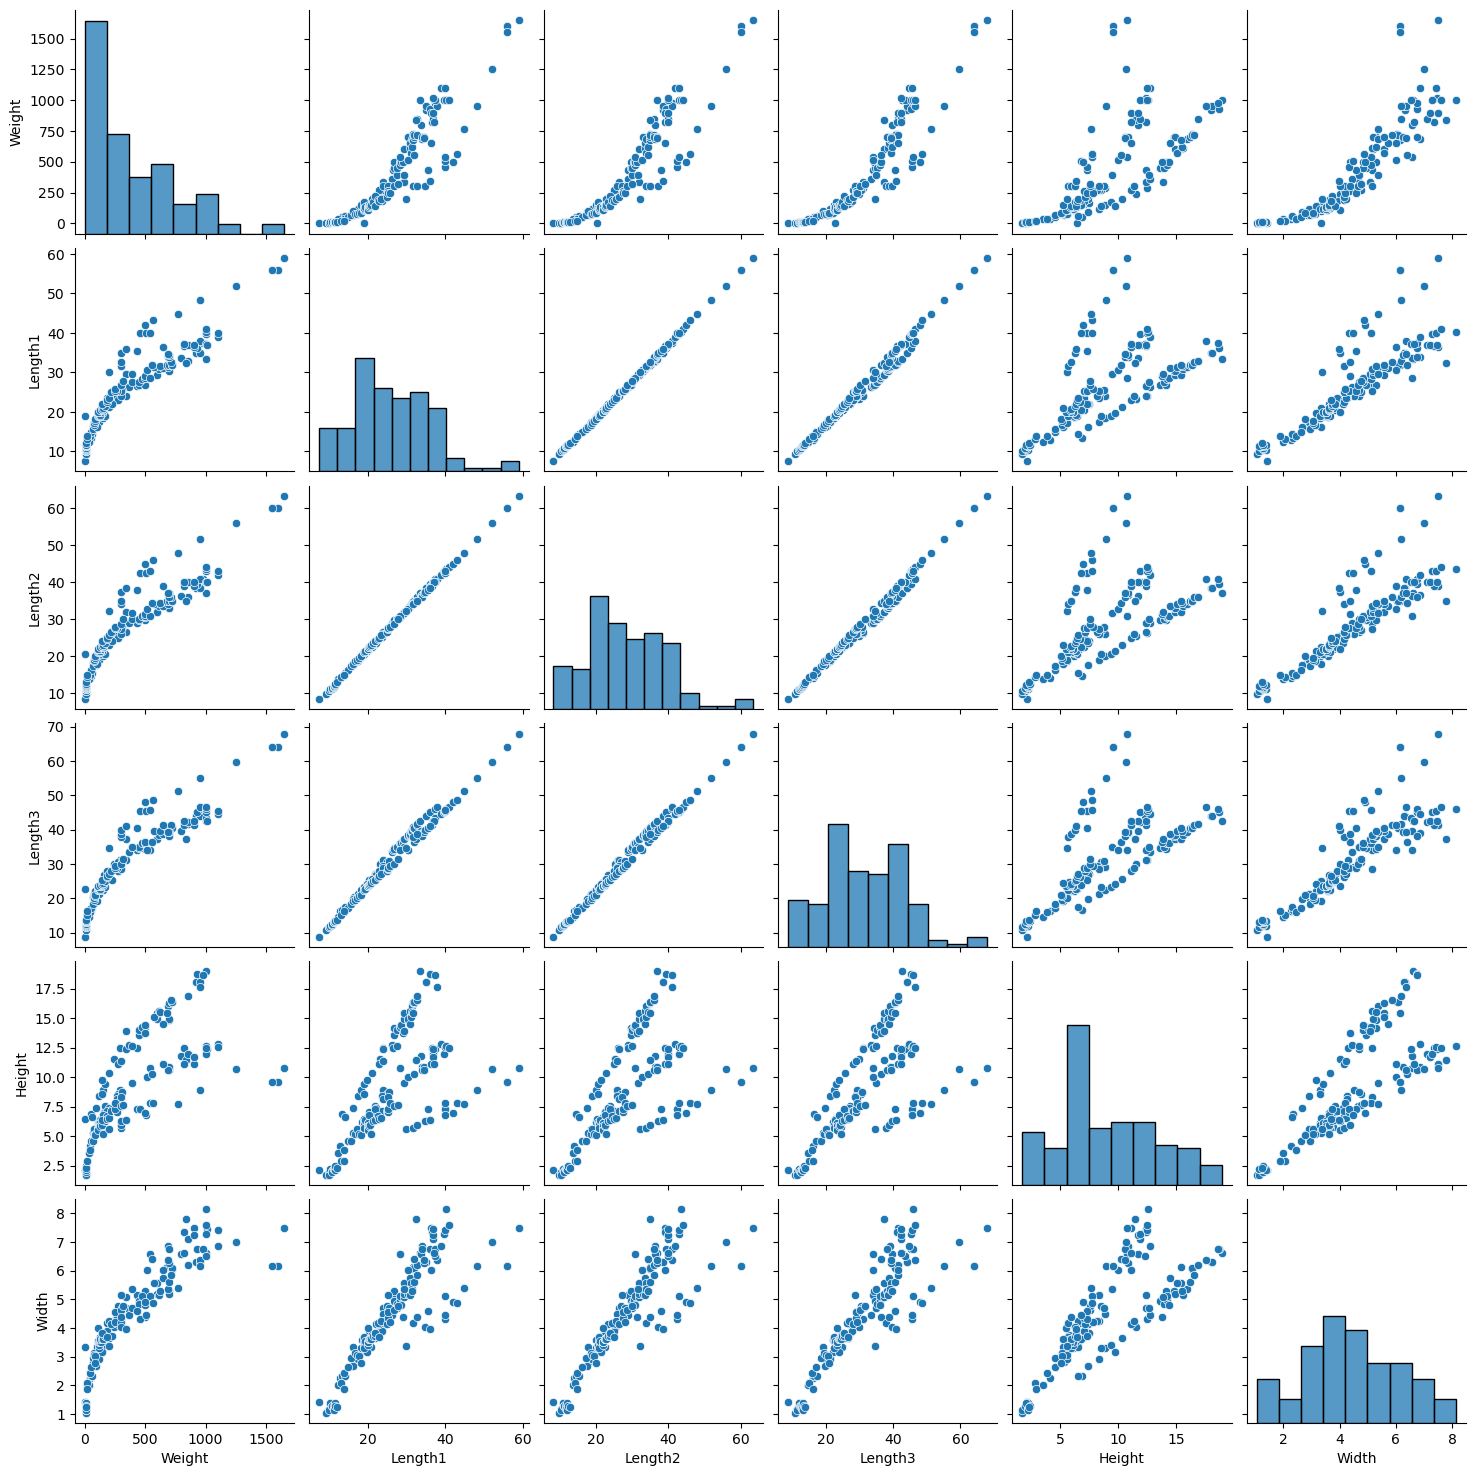

In [16]:
sns.pairplot(data)

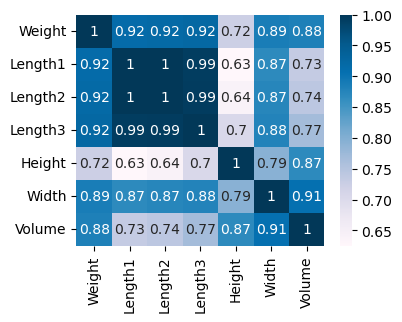

In [18]:
#Ahora considerando el volumen
data1=df.loc[:,'Weight':'Volume']

plt.figure(figsize=(4,3))
sns.heatmap(data1.corr(), annot=True, cmap=plt.cm.PuBu)
plt.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


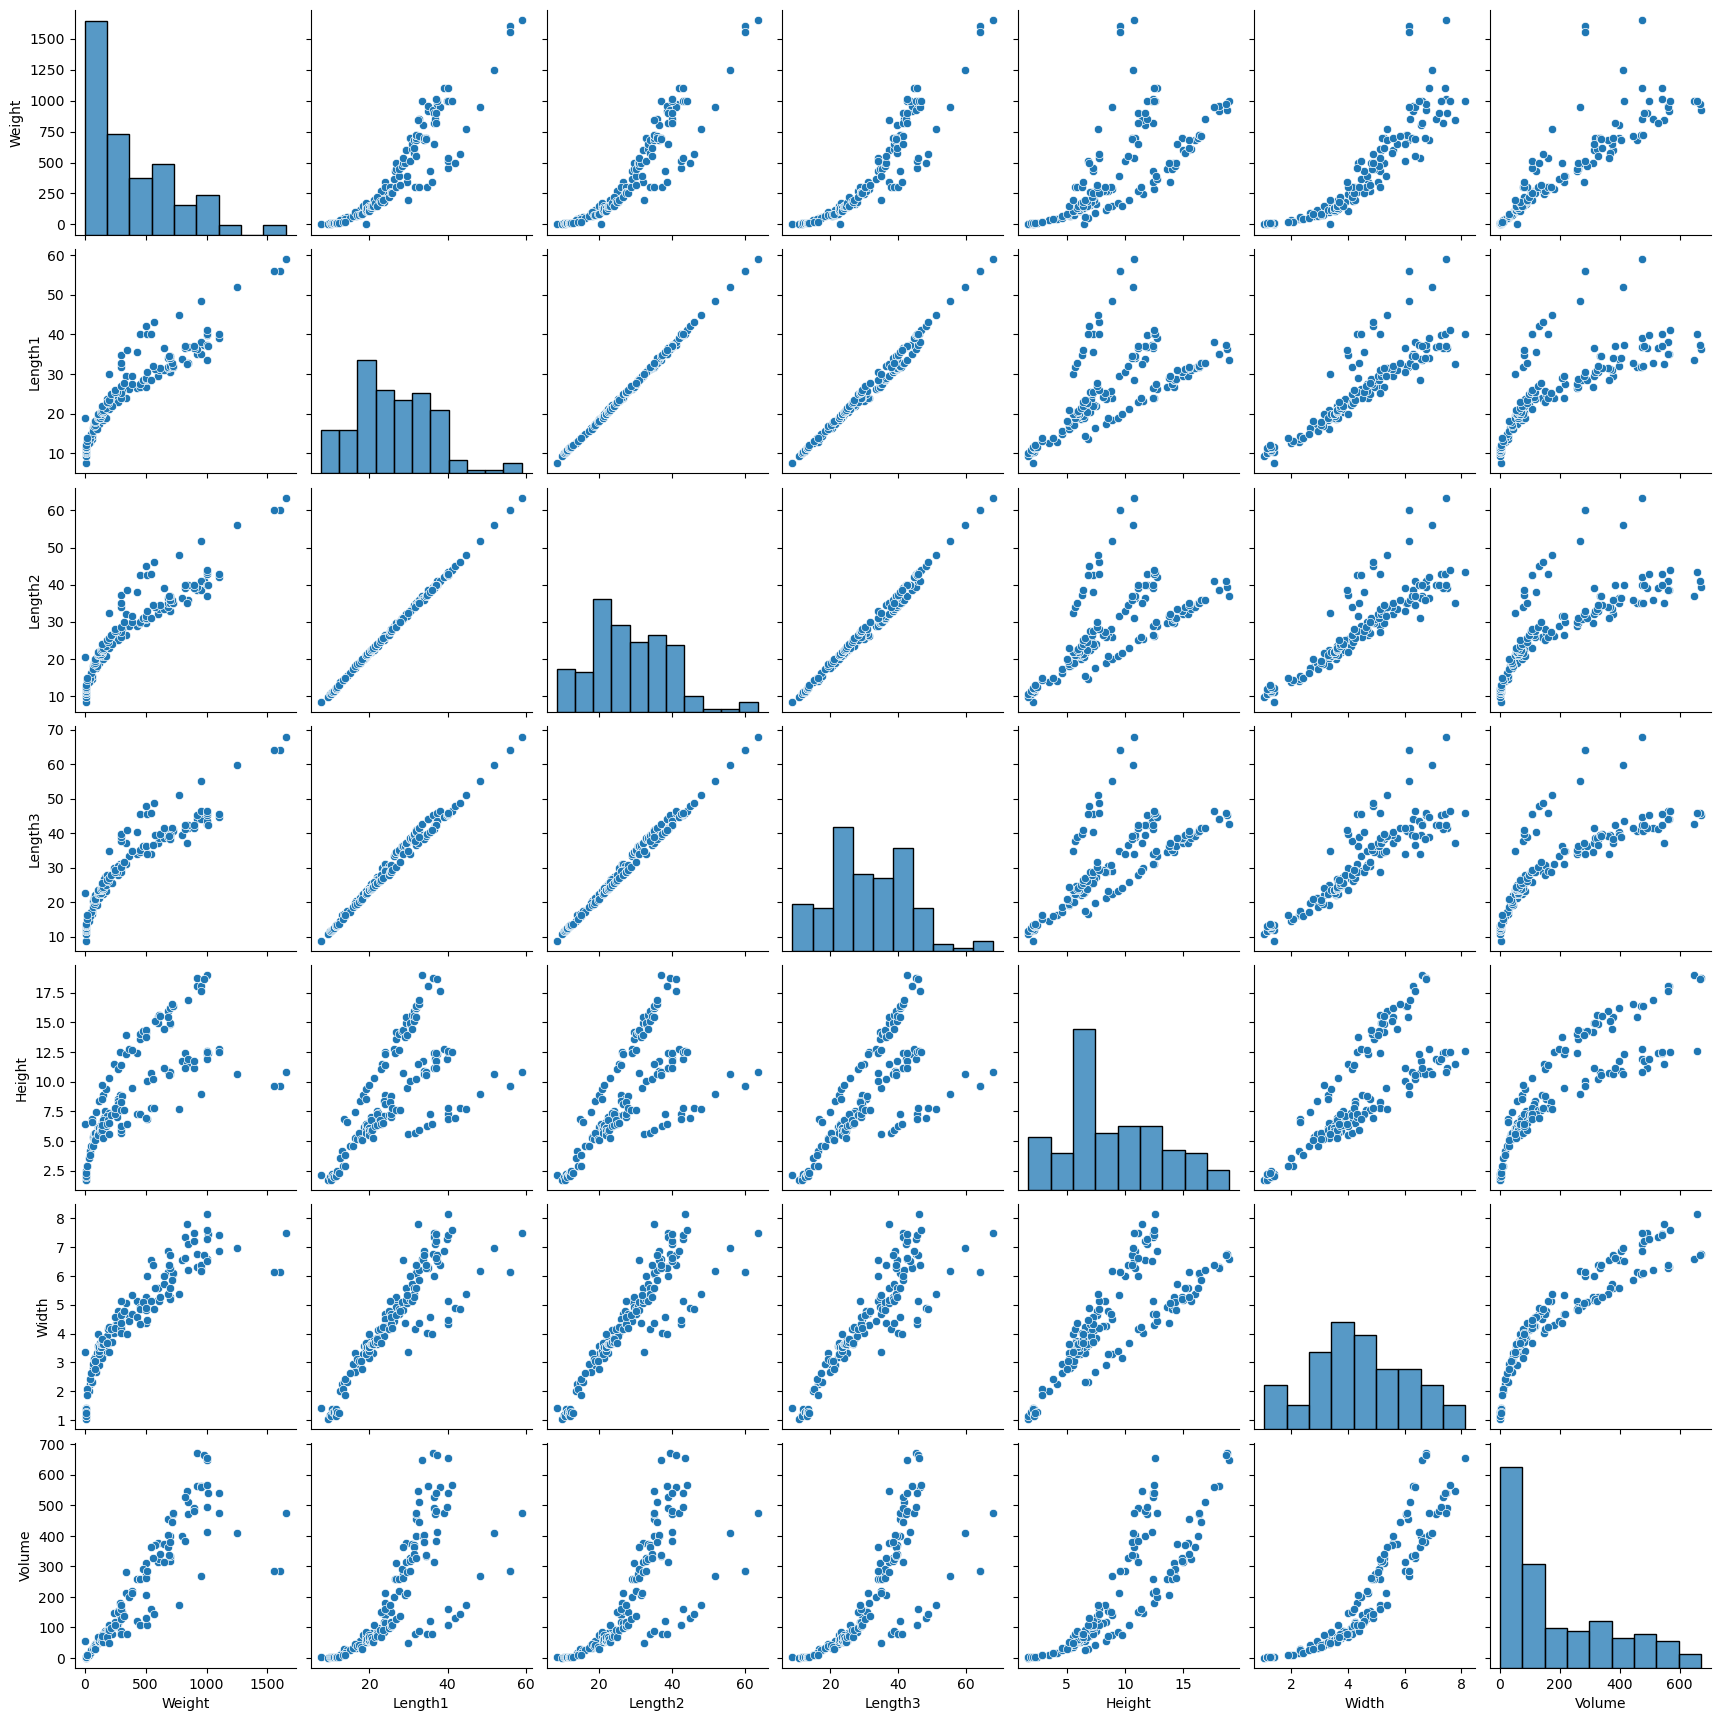

In [19]:
sns.pairplot(data1)

In [ ]:
# Al agregar el volumen las correlaciones se mantienen similares. 

In [ ]:
#3. Construye un modelo de regresión lineal que relacione el volumen y el peso de los peces. Realiza una breve evaluación del modelo y grafícalo.

In [25]:
# Filtrar las columnas necesarias
data_3 = df.loc[:,['Weight','Volume']]
data_3

,Weight,Volume
0,242.0,146.215854
1,290.0,181.707071
2,340.0,214.391723
3,363.0,198.477454
4,430.0,257.609344
...,...,...
154,12.2,3.188567
155,13.4,3.073402
156,12.2,2.820291
157,19.7,9.641848


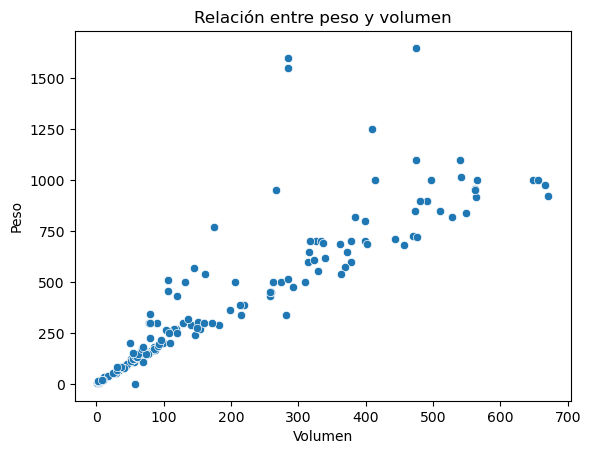

In [26]:
# Crear una gráfica de dispersión
sns.scatterplot(x="Volume", y="Weight", data=data_3)
plt.title("Relación entre peso y volumen")
plt.xlabel("Volumen")
plt.ylabel("Peso")
plt.show()

In [27]:
data_3.corr()

,Weight,Volume
Weight,1.000000,0.881981
Volume,0.881981,1.000000


In [ ]:
# Existe alta correlación entre las variables.

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.776    
Dependent Variable: Weight           AIC:                2084.9801
Date:               2024-05-09 15:43 BIC:                2091.1180
No. Observations:   159              Log-Likelihood:     -1040.5  
Df Model:           1                F-statistic:        549.9    
Df Residuals:       157              Prob (F-statistic): 3.65e-53 
R-squared:          0.778            Scale:              28644.   
--------------------------------------------------------------------
            Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const      58.7401    19.7453    2.9749   0.0034   19.7394   97.7407
Volume      1.7396     0.0742   23.4491   0.0000    1.5931    1.8861
------------------------------------------------------------------
Omnibus:              156.660      Durbin-Watson:         0.435   
Pro

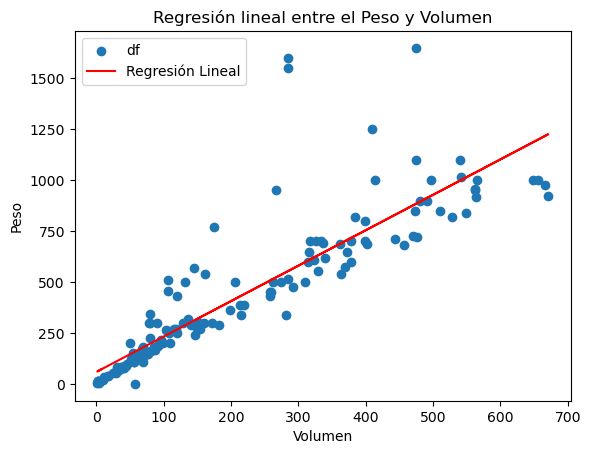

In [34]:
#Definir las variables predictoras (X) y la variable de respuesta (y)
X = df["Volume"]
y = df["Weight"]

# Agregar una constante al predictor (intercepto)
X = sm.add_constant(X)

# Crear el modelo de regresión lineal
model = sm.OLS(y, X).fit() # entrenamos el modelo

# Obtener los resultados del modelo
results = model.summary2()

# Imprimir los resultados
print(results)

# Graficar la regresión lineal
plt.scatter(df["Volume"],df["Weight"], label="df")
plt.plot (df["Volume"], model.predict(X), color='red', label="Regresión Lineal")  # predecimos los valores de y
plt.title("Regresión lineal entre el Peso y Volumen")
plt.xlabel("Volumen")
plt.ylabel("Peso")
plt.legend()
plt.show()



In [ ]:
# existe una relación lineal entre peso y volumen.

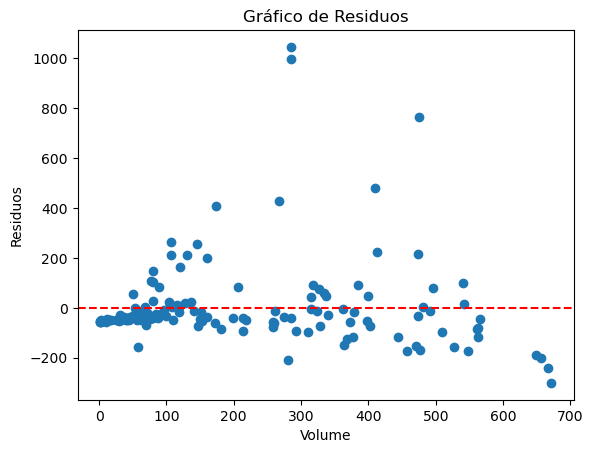

In [35]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df["Volume"], df["Weight"])
residuals = df["Weight"] - (slope * df["Volume"] + intercept)

# Mostrar un gráfico de los residuos
plt.figure()
plt.scatter(df["Volume"], residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Gráfico de Residuos")
plt.xlabel("Volume")
plt.ylabel("Residuos")
plt.show()

In [ ]:
#4.- ¿Qué sucede si aplicas el modelo anterior por separado a cada especie de peces? Explica.

In [43]:
lista = df["Species"].unique()
lista

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [56]:
def prueba(lista,df):
    for i in lista:
        x = df[df['Species'] == i]['Weight']
        y = df[df['Species'] == i]['Volume']
        sns.scatterplot(x="Volume", y="Weight", data=df)
        plt.title(f"Relación entre Weight y Volume para {i}")
        plt.xlabel("Volume" )
        plt.ylabel("Weight")
        plt.show()
        x = sm.add_constant(x)
        model = sm.OLS(y, x).fit()
        results = model.summary2()
        print(results)
        


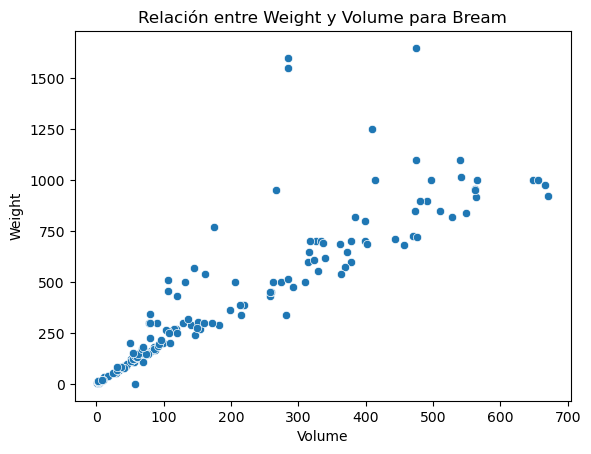

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.895   
Dependent Variable: Volume           AIC:                370.0396
Date:               2024-05-09 17:21 BIC:                373.1503
No. Observations:   35               Log-Likelihood:     -183.02 
Df Model:           1                F-statistic:        289.7   
Df Residuals:       33               Prob (F-statistic): 6.65e-18
R-squared:          0.898            Scale:              2163.0  
------------------------------------------------------------------
             Coef.    Std.Err.     t     P>|t|    [0.025    0.975]
------------------------------------------------------------------
const       -32.5269   24.8320  -1.3099  0.1993  -83.0480  17.9943
Weight        0.6489    0.0381  17.0195  0.0000    0.5713   0.7264
-----------------------------------------------------------------
Omnibus:               1.139        Durbin-Watson:          1.888
Prob(Omnibus):        

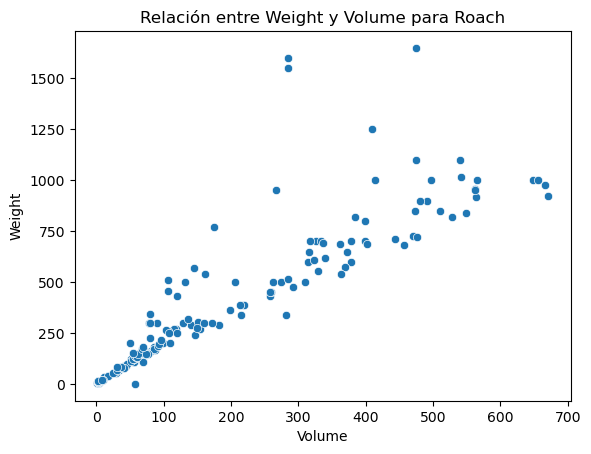

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.882   
Dependent Variable: Volume           AIC:                168.8419
Date:               2024-05-09 17:21 BIC:                170.8333
No. Observations:   20               Log-Likelihood:     -82.421 
Df Model:           1                F-statistic:        143.4   
Df Residuals:       18               Prob (F-statistic): 5.21e-10
R-squared:          0.888            Scale:              247.05  
-------------------------------------------------------------------
          Coef.    Std.Err.      t      P>|t|     [0.025     0.975]
-------------------------------------------------------------------
const     3.5366     7.1028    0.4979   0.6246   -11.3858   18.4589
Weight    0.4862     0.0406   11.9762   0.0000     0.4009    0.5714
-----------------------------------------------------------------
Omnibus:              27.795       Durbin-Watson:          1.576 
Prob(Omnibus):   

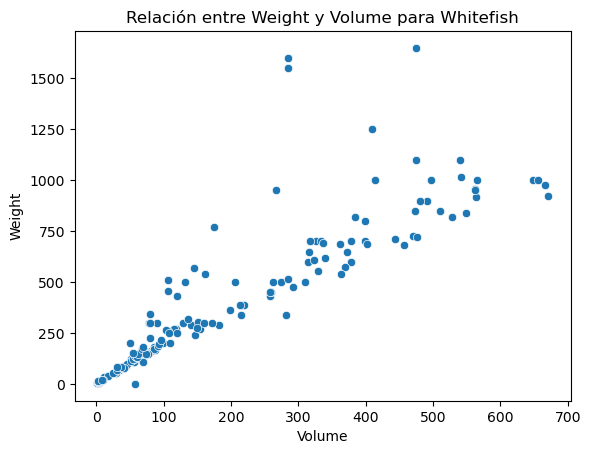

C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.826  
Dependent Variable: Volume           AIC:                67.8987
Date:               2024-05-09 17:21 BIC:                67.4822
No. Observations:   6                Log-Likelihood:     -31.949
Df Model:           1                F-statistic:        24.66  
Df Residuals:       4                Prob (F-statistic): 0.00767
R-squared:          0.860            Scale:              3704.7 
-----------------------------------------------------------------
            Coef.   Std.Err.    t     P>|t|     [0.025    0.975] 
-----------------------------------------------------------------
const      28.3116   52.8868  0.5353  0.6208  -118.5257  175.1488
Weight      0.4366    0.0879  4.9661  0.0077     0.1925    0.6807
----------------------------------------------------------------
Omnibus:               nan         Durbin-Watson:          1.616
Prob(Omnibus):         nan         Ja

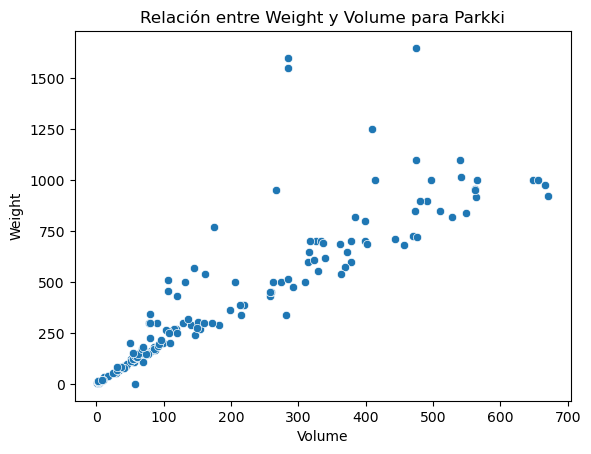

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.995   
Dependent Variable: Volume           AIC:                58.2000 
Date:               2024-05-09 17:21 BIC:                58.9958 
No. Observations:   11               Log-Likelihood:     -27.100 
Df Model:           1                F-statistic:        1974.   
Df Residuals:       9                Prob (F-statistic): 7.41e-12
R-squared:          0.995            Scale:              9.8756  
-------------------------------------------------------------------
          Coef.    Std.Err.      t      P>|t|     [0.025     0.975]
-------------------------------------------------------------------
const    -6.4655     2.1712   -2.9778   0.0155   -11.3771   -1.5539
Weight    0.5607     0.0126   44.4317   0.0000     0.5321    0.5892
-----------------------------------------------------------------
Omnibus:              0.795        Durbin-Watson:           1.189
Prob(Omnibus):   

C:\Users\Lenovo\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


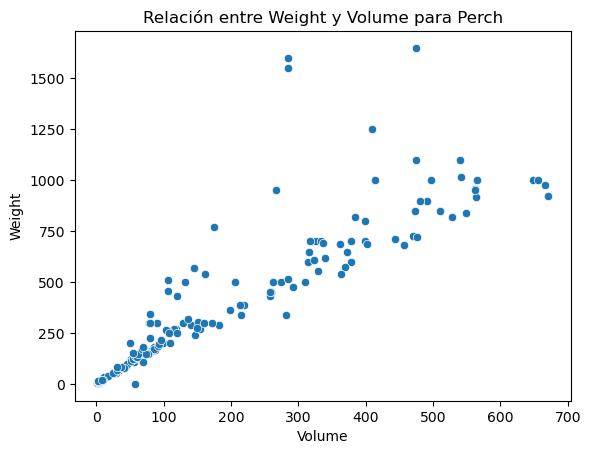

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.967   
Dependent Variable: Volume           AIC:                560.0148
Date:               2024-05-09 17:21 BIC:                564.0655
No. Observations:   56               Log-Likelihood:     -278.01 
Df Model:           1                F-statistic:        1617.   
Df Residuals:       54               Prob (F-statistic): 6.27e-42
R-squared:          0.968            Scale:              1245.5  
-------------------------------------------------------------------
          Coef.     Std.Err.      t      P>|t|     [0.025    0.975]
-------------------------------------------------------------------
const    -12.8666     7.0444   -1.8265   0.0733   -26.9898   1.2566
Weight     0.5504     0.0137   40.2081   0.0000     0.5230   0.5779
-----------------------------------------------------------------
Omnibus:              15.151       Durbin-Watson:          1.388 
Prob(Omnibus):   

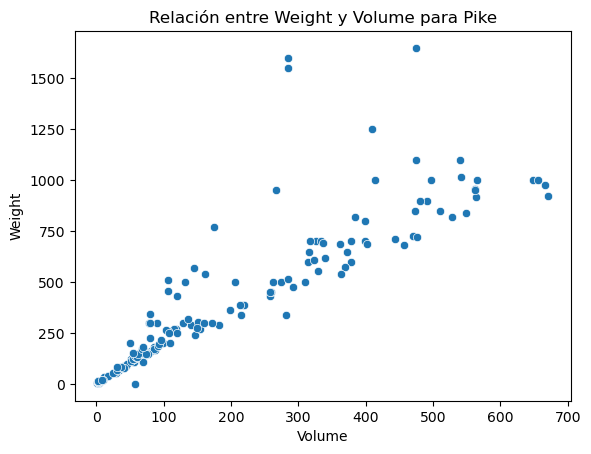

C:\Users\Lenovo\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.832   
Dependent Variable: Volume           AIC:                183.5069
Date:               2024-05-09 17:21 BIC:                185.1733
No. Observations:   17               Log-Likelihood:     -89.753 
Df Model:           1                F-statistic:        80.17   
Df Residuals:       15               Prob (F-statistic): 2.10e-07
R-squared:          0.842            Scale:              2556.8  
-------------------------------------------------------------------
           Coef.    Std.Err.     t      P>|t|     [0.025     0.975]
-------------------------------------------------------------------
const     14.3067    22.1009   0.6473   0.5272   -32.8003   61.4136
Weight     0.2291     0.0256   8.9536   0.0000     0.1745    0.2836
-----------------------------------------------------------------
Omnibus:              2.158        Durbin-Watson:           2.146
Prob(Omnibus):   

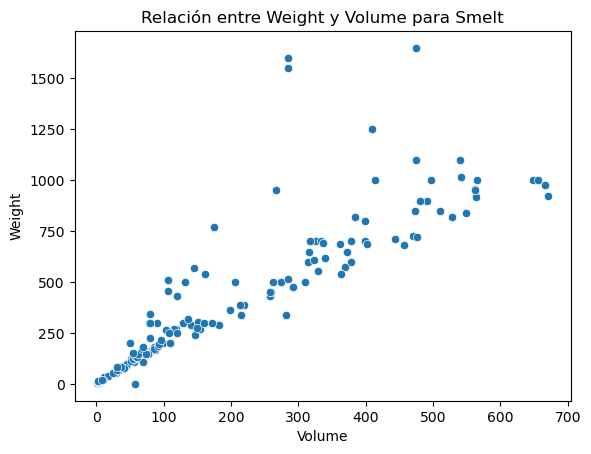

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.868   
Dependent Variable: Volume           AIC:                37.5076 
Date:               2024-05-09 17:21 BIC:                38.7857 
No. Observations:   14               Log-Likelihood:     -16.754 
Df Model:           1                F-statistic:        86.39   
Df Residuals:       12               Prob (F-statistic): 7.84e-07
R-squared:          0.878            Scale:              0.74802 
-------------------------------------------------------------------
           Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
-------------------------------------------------------------------
const     -2.5853     0.6890   -3.7525   0.0028   -4.0864   -1.0842
Weight     0.5397     0.0581    9.2949   0.0000    0.4132    0.6662
-----------------------------------------------------------------
Omnibus:               0.242        Durbin-Watson:          1.368
Prob(Omnibus):   

C:\Users\Lenovo\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [57]:
prueba(lista,df)

In [ ]:
# En general por especies se observa un R2 ajustado mas alto que al juntar todas las especies.

In [64]:
# 5.- Construye un modelo de regresión que relacione dos o más variables con el peso de los peces. Realiza una breve evaluación del modelo.

#Definir variables predictoras (X) y variable de respuesta (y)
x = df[['Length1','Length2']] 
y = df['Weight'] 

#Agregar una constante (intercepto) a las variables predictoras
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

#Obtener resultados del modelo
results = model.summary()

predictions = model.predict(x)

# Calcular el Error Cuadrático Medio (MSE)
mse = ((y - predictions) ** 2).mean()

# Calcular el Error Cuadrático Medio Explicado (EMSE)
emse = mse / ((y - y.mean()) ** 2).mean()

# Obtener el valor R² del modelo
r2 = model.rsquared

print(results)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Error Mean Squared Explicado (EMSE): {emse:.2f}")
print(f"Coeficiente de Determinación (R²): {r2:.2f}")




                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     442.5
Date:                Thu, 09 May 2024   Prob (F-statistic):           5.05e-65
Time:                        17:57:22   Log-Likelihood:                -1009.2
No. Observations:                 159   AIC:                             2024.
Df Residuals:                     156   BIC:                             2034.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -496.2047     32.645    -15.200      0.0

In [ ]:
# El mododelo tiene un Rajustado  de 0.84,un F-estadístico alto y una probabilidad asociada muy baja indican que el modelo de regresión es significativo y que las variables independientes tienen un efecto conjunto significativo sobre la variable dependiente.